# Days overdue feature in the dataset

This notebook is dedicated to show evidence that anonymized `D_39` feature is in fact `days_overdue` feature - which is equivalent to the `target` in this competition!

ref: https://www.kaggle.com/code/raddar/deanonymized-days-overdue-feat-amex/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_parquet('../input/amex-data-integer-dtypes-parquet-format/train.parquet')

## Days?

First, let's describe visualize the distribution of this feature.

In [2]:
# count of 0
np.sum(train['D_39']==0)/train.shape[0]

0.5520184486855257

대부분의 값이 0임을 볼 수 있다. (0: 연체일)

y축을 log-scale로 바꾸어 분포를 보면

<AxesSubplot:xlabel='D_39', ylabel='Density'>

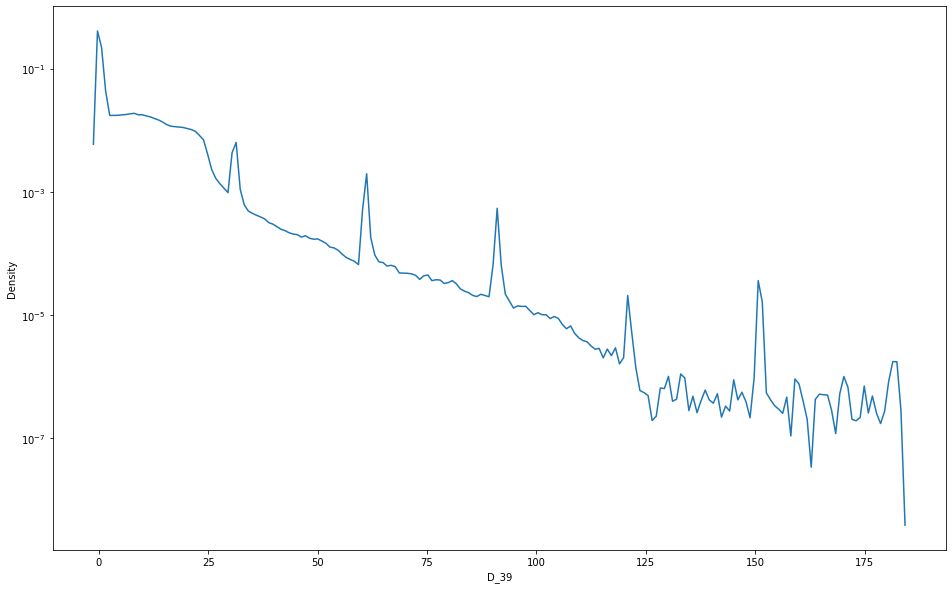

In [3]:
plt.figure(figsize=(16, 10))
sns.kdeplot(train['D_39'], log_scale=[False,True])

`D_39`의 최대값이 183이다. (6개월의 day와 같다)
또한, 31, 61, 121, 151마다 분포가 뛰는데, `D_39`는 다른 방식으로 계산 됨을 알 수 있다. (일시불 또는 할부)
그런데, 여기서 중요한거는 이 feature가 day와 연관되어있다는 것이다.

So... all the `D_39` values are less than 6 months (~180 days). Does this mean that the dataset only contains 'good' customers? meaning only such customers who have never previously defaulted?

## Already defaulted in train?

큰 `D_39`값을 가진 고객을 보면 다음과 같다.

In [4]:
pd.options.display.max_colwidth = 100
cols = ['customer_ID','S_2','P_2']+[x for x in train.columns if 'D_' in x]
train.loc[train.D_39>170, cols].head(10)

,customer_ID,S_2,P_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
52277,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-03-18,-0.163640,181,3.129832,0.165268,NaN,1,0.021573,NaN,...,-1,-1,-1,0,0,0.000000,NaN,0,0.003475,0
158300,07683296b5cdbcbb9fb41884a545ed7490dbf17816358af23fec5d8c4a03ccf6,2017-04-06,0.041975,171,3.599588,NaN,0.083170,1,0.223524,0.451023,...,-1,-1,-1,0,0,0.000000,NaN,0,0.005931,0
502450,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-09-10,-0.017945,176,5.425975,NaN,0.940984,3,0.150006,0.534335,...,-1,-1,-1,0,0,0.000000,NaN,0,0.001701,0
502452,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-11-12,0.023149,178,5.636489,NaN,0.584697,3,0.159082,0.553343,...,-1,-1,-1,0,0,0.000000,NaN,0,0.005947,0
553454,19bf7c6c1c1419d88486f4b4174fb11fb7fa76089be1bfcefab6cf750498827b,2017-03-21,0.288445,182,2.628100,NaN,0.296747,1,0.710962,0.461591,...,-1,-1,-1,0,0,0.000000,NaN,0,0.001588,0
600209,1be3fc5bae9ee6b1e65173c49fb5c31d640ab77bfb560685f6fffab99abb349c,2017-05-04,0.147593,181,1.382033,NaN,0.039977,2,0.064352,0.460607,...,-1,-1,-1,0,0,0.000000,NaN,0,0.000541,0
739555,225f220b94dcb32c50bcf204c1d7e5960a38f64e8e6968cfeae8c8308a36622d,2017-03-30,-0.038225,177,1.935308,NaN,0.441993,2,0.145822,0.594598,...,-1,-1,-1,0,0,0.000000,NaN,0,0.007865,0
739556,225f220b94dcb32c50bcf204c1d7e5960a38f64e8e6968cfeae8c8308a36622d,2017-04-03,-0.035885,181,1.936089,NaN,0.428361,2,0.139881,0.593538,...,-1,-1,-1,0,0,0.000000,NaN,0,0.004222,0
741965,227ad361f5e56045d397db6f518fffb9822187d9f626a05d1002ec949714cfdb,2017-04-29,0.260206,181,5.466421,NaN,0.057923,1,0.089363,0.350754,...,-1,-1,-1,1,0,0.921352,0.278323,1,1.071446,1
847644,27599fa5d5d854cc4c149b853fa09b7764320d43ec8de7bbc9fa652dec948908,2017-09-14,0.220536,171,2.616064,NaN,NaN,1,0.162980,0.445296,...,-1,-1,-1,0,0,0.000000,NaN,0,0.007916,0


몇몇 환자의 케이스를 살펴보자

In [5]:
train.loc[train.customer_ID=='026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4', cols]

,customer_ID,S_2,P_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
52277,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-03-18,-0.163640,181,3.129832,0.165268,NaN,1,0.021573,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.003475,0
52278,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-06-20,0.154650,0,0.000000,NaN,0.158317,0,0.033676,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.009473,0
52279,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-07-22,0.139682,0,0.000000,NaN,0.104276,0,0.032943,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.004630,0
52280,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-08-24,0.226071,7,0.000000,NaN,0.086369,0,0.034528,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.007242,0
52281,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-09-27,0.249057,0,0.000000,NaN,0.072399,0,0.042004,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.005070,0
52282,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-10-18,0.243222,0,0.000000,NaN,0.069311,0,0.039512,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.002016,0
52283,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2017-12-18,0.201851,1,0.000000,NaN,0.057576,1,0.048053,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.004366,0
52284,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2018-01-25,0.247355,8,0.000000,NaN,0.050394,1,0.045768,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.006549,0
52285,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2018-02-23,0.214900,9,0.000000,NaN,0.051995,1,0.044976,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.008154,0
52286,026ef3a81feea5de51a09d5796b996a1e3ec306ccd7327dd96d55d8d440203a4,2018-03-16,0.212387,0,0.000000,NaN,0.044303,1,0.055878,NaN,...,-1,-1,-1,0,0,0.0,NaN,0,0.008516,0


In [6]:
train.loc[train.customer_ID=='07683296b5cdbcbb9fb41884a545ed7490dbf17816358af23fec5d8c4a03ccf6', cols]

,customer_ID,S_2,P_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
158299,07683296b5cdbcbb9fb41884a545ed7490dbf17816358af23fec5d8c4a03ccf6,2017-03-04,0.050885,139,3.398947,NaN,0.085657,1,0.223115,0.449345,...,-1,-1,-1,0,0,0.0,NaN,0,0.003396,0
158300,07683296b5cdbcbb9fb41884a545ed7490dbf17816358af23fec5d8c4a03ccf6,2017-04-06,0.041975,171,3.599588,NaN,0.083170,1,0.223524,0.451023,...,-1,-1,-1,0,0,0.0,NaN,0,0.005931,0
158301,07683296b5cdbcbb9fb41884a545ed7490dbf17816358af23fec5d8c4a03ccf6,2018-03-25,0.303271,9,0.000000,NaN,NaN,1,0.251365,0.447813,...,-1,-1,-1,0,0,0.0,NaN,0,0.001951,0


In [7]:
train.loc[train.customer_ID=='176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77', cols]


,customer_ID,S_2,P_2,D_39,D_41,D_42,D_43,D_44,D_45,D_46,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
502445,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-03-09,0.045294,145,3.499974,NaN,0.515436,3,0.135030,0.680850,...,-1,-1,-1,0,0,0.0,NaN,0,0.005286,0
502446,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-04-01,0.053146,0,3.709054,NaN,0.496937,3,0.138849,0.617992,...,-1,-1,-1,0,0,0.0,NaN,0,0.006057,0
502447,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-05-09,0.077328,0,4.302803,NaN,0.462735,3,0.139858,0.516088,...,-1,-1,-1,0,0,0.0,NaN,0,0.002026,0
502448,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-06-08,0.093732,0,4.616358,NaN,0.451490,3,0.140938,0.492413,...,-1,-1,-1,0,0,0.0,NaN,0,0.002127,0
502449,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-07-08,0.048199,0,4.790996,NaN,0.401062,3,0.149210,0.470793,...,-1,-1,-1,0,0,0.0,NaN,0,0.008956,0
502450,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-09-10,-0.017945,176,5.425975,NaN,0.940984,3,0.150006,0.534335,...,-1,-1,-1,0,0,0.0,NaN,0,0.001701,0
502451,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-10-03,0.017393,169,5.489826,NaN,0.712525,3,0.156025,0.530086,...,-1,-1,-1,0,0,0.0,NaN,0,0.005787,0
502452,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2017-11-12,0.023149,178,5.636489,NaN,0.584697,3,0.159082,0.553343,...,-1,-1,-1,0,0,0.0,NaN,0,0.005947,0
502453,176ad229cbd819198ffc212077a54ea3c3b4a1edbd7b5a10fd461a062de27f77,2018-03-01,0.067336,0,0.000000,NaN,0.420827,-1,0.164661,-0.138395,...,-1,-1,-1,0,0,0.0,NaN,0,0.007461,0


여기서 볼수 있는것은 큰 `D_39`가 오고나서 month가 없다는 것이다. 이는 `D_39` 값이 이 사라진 기간동안 증가함을 나타낼수 있다.
하지만 3번째 고객을 보면 꼭 그렇지는 않은데 사유는 다음과 같을 것이다.

date 차이만큼 overdue가 증가하지 않는 이유는 최소한의 지불이 발생했다는 의미이다.  
3번쨰 환자의 경우  
6번째 날짜 (2017-09-10)은 176 days를 보이고, 그 다음 날짜는 2017-10-03 (23일 지남)인데 169 days를 보인다. 다음과 같이 설명 가능하다.
176 days - 30 days (최소한의 지불) + 23 days (두 날짜간 차이) = 169 days

이는 7번째, 8번째 날짜의 경우에서도 확인 가능한데
169 days - 30 days (최소한의 지불) + 39 days (두 날짜간 차이) = 178 days


또한, `D_39`가 180보다 큰 경우와 같은 경우 즉, 이미 default를 한 경우의 month는 삭제함을 알 수 있.
이를 이용해 할 수 있는 것는 다음과 같다.
1. 큰 D_39와 missing month와 관련된 feature engineering
2. customer timeline을 segment로 나누어 데이터셋을 확장시키는 것

최종적으로는 마지막 row만 사용하는 것이 아니라 default에 대한 모든 row를 학습 데이터로 사용할 수 있을 것이다. 
하지만, 현재는 이를 반영해도 좋은 결과가 나오지 않는다. (target값이 noisy 하기에 )  

